In [50]:
import pandas as pd
import seaborn as sns
import pdb
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

In [51]:
df = pd.read_csv(r"C:\Users\oscar\Documents\games.csv")

In [52]:
meta = pd.read_json(r"C:\Users\oscar\Documents\games_metadata.json", lines=True)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50503 entries, 0 to 50502
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app_id          50503 non-null  int64  
 1   title           50503 non-null  object 
 2   date_release    50503 non-null  object 
 3   win             50503 non-null  bool   
 4   mac             50503 non-null  bool   
 5   linux           50503 non-null  bool   
 6   rating          50503 non-null  object 
 7   positive_ratio  50503 non-null  int64  
 8   user_reviews    50503 non-null  int64  
 9   price_final     50503 non-null  float64
 10  price_original  50503 non-null  float64
 11  discount        50503 non-null  float64
 12  steam_deck      50503 non-null  bool   
dtypes: bool(4), float64(3), int64(3), object(3)
memory usage: 3.7+ MB


In [54]:
df.head(10)

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True
5,250180,METAL SLUG 3,2015-09-14,True,False,False,Very Positive,90,5579,7.99,7.99,0.0,True
6,253980,Enclave,2013-10-04,True,True,True,Mostly Positive,75,1608,4.99,4.99,0.0,True
7,271850,Men of War: Assault Squad 2 - Deluxe Edition u...,2014-05-16,True,False,False,Mixed,61,199,6.99,6.99,0.0,True
8,282900,Hyperdimension Neptunia Re;Birth1,2015-01-29,True,False,False,Very Positive,94,9686,14.99,14.99,0.0,True
9,19810,The Sum of All Fears,2008-10-10,True,False,False,Mostly Positive,75,33,9.99,9.99,0.0,True


In [55]:
meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50503 entries, 0 to 50502
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   app_id       50503 non-null  int64 
 1   description  50503 non-null  object
 2   tags         50503 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [56]:
df = df.merge(meta, on='app_id')


In [57]:
df.drop('description', axis = 1)

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck,tags
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True,"[Action, Adventure, Parkour, Third Person, Gre..."
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True,[Action]
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True,"[Co-op, Stealth, Indie, Heist, Local Co-Op, St..."
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True,"[Zombies, Adventure, Survival, Action, Third P..."
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True,"[Roguelike, Strategy, Tower Defense, Pixel Gra..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50498,2432010,The Stranded Traveler,2023-06-16,True,False,False,Positive,80,26,0.00,0.00,0.0,True,"[Adventure, Action, Action-Adventure, Platform..."
50499,668600,Pixelum,2020-10-01,True,False,False,Mixed,41,58,0.00,0.00,0.0,True,"[RPG, Adventure, Simulation, Indie, Early Acce..."
50500,2071510,Goblin Rules Football,2022-10-20,True,True,True,Mostly Positive,72,11,0.00,0.00,0.0,True,"[Sports, Arcade, 2D, Football (American), Team..."
50501,2446220,World of Tanks Blitz - Welcome Bundle,2023-05-25,True,True,False,Mixed,63,199,0.00,0.00,0.0,True,"[Action, Free to Play, Massively Multiplayer]"


In [58]:
df.isnull().sum(axis=1).sum()

0

In [59]:
df.drop_duplicates(subset=['app_id', 'title', 'date_release', 'win', 'mac', 'linux',
                             'rating', 'positive_ratio', 'user_reviews', 'price_final',
                             'price_original', 'discount', 'steam_deck'], inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50503 entries, 0 to 50502
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app_id          50503 non-null  int64  
 1   title           50503 non-null  object 
 2   date_release    50503 non-null  object 
 3   win             50503 non-null  bool   
 4   mac             50503 non-null  bool   
 5   linux           50503 non-null  bool   
 6   rating          50503 non-null  object 
 7   positive_ratio  50503 non-null  int64  
 8   user_reviews    50503 non-null  int64  
 9   price_final     50503 non-null  float64
 10  price_original  50503 non-null  float64
 11  discount        50503 non-null  float64
 12  steam_deck      50503 non-null  bool   
 13  description     50503 non-null  object 
 14  tags            50503 non-null  object 
dtypes: bool(4), float64(3), int64(3), object(5)
memory usage: 4.4+ MB


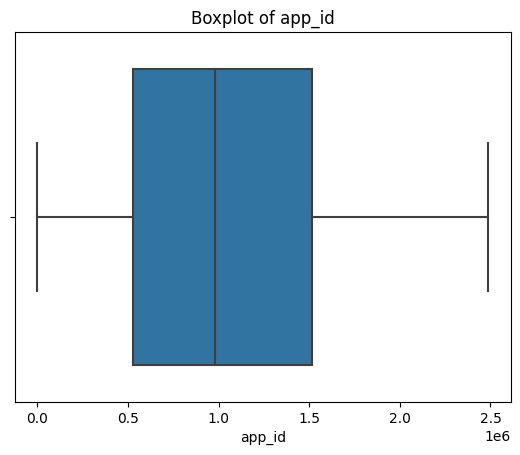

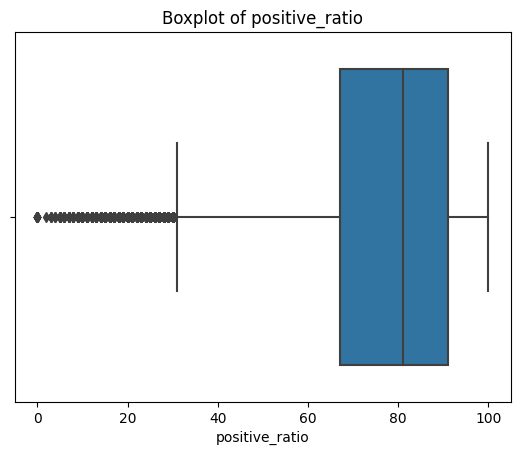

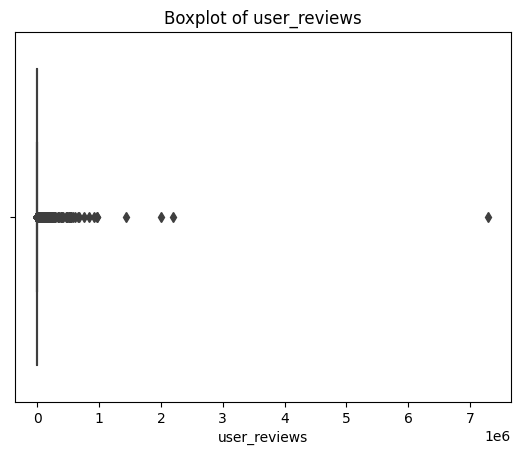

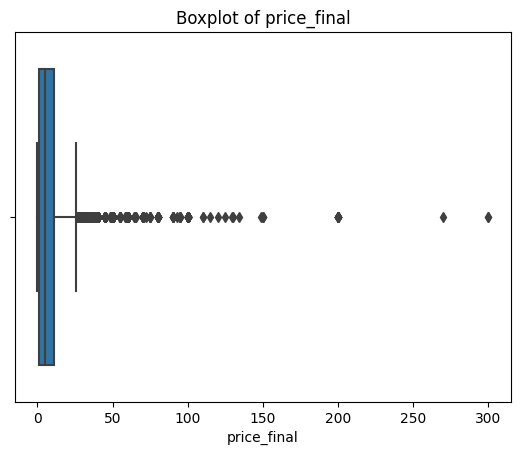

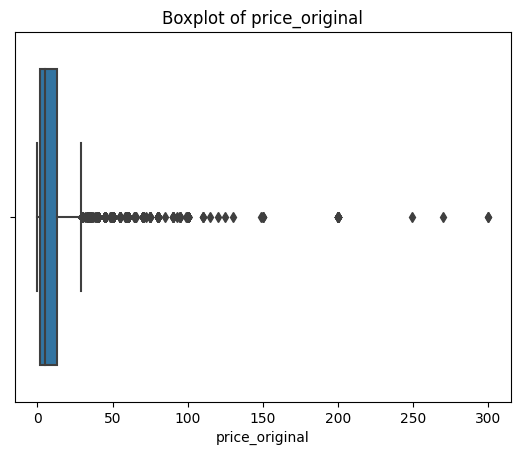

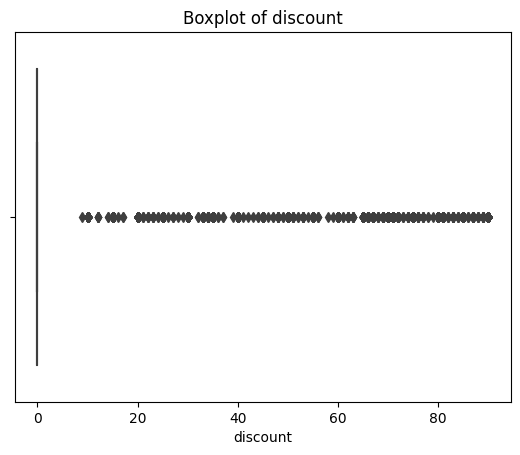

In [60]:
numerical_columns = df.select_dtypes(include=['int', 'float']).columns

# Create separate boxplots for numerical columns
for column in numerical_columns:
    plt.figure()  # Create a new figure for each boxplot
    sns.boxplot(x=column, data=df)
    plt.title(f"Boxplot of {column}")  # Set the title for each boxplot
    plt.show()

In [70]:
df_t1 = df

df_t2 = df

In [78]:
# Step 1: Calculate the first quartile (Q1) and third quartile (Q3) of the column
Q1 = df_t1['user_reviews'].quantile(0.25)
Q3 = df_t1['user_reviews'].quantile(0.75)

# Step 2: Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Step 3: Define the outlier thresholds (1.5 times the IQR)
lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR

# Step 4: Filter the DataFrame to keep only the rows within the defined thresholds
df_t1 = df_t1[(df_t1['user_reviews'] >= lower_threshold) & (df_t1['user_reviews'] <= upper_threshold)]

In [77]:
import pandas as pd

# Step 1: Calculate the mean and standard deviation of the column
mean_value = df_t2['user_reviews'].mean()
std_deviation = df_t2['user_reviews'].std()

# Step 2: Define a threshold to identify outliers (3 standard deviations from the mean)
outlier_threshold = 3 * std_deviation

# Step 3: Filter the DataFrame to keep only the rows within the defined threshold
df_t2 = df_t2[abs(df_t2['user_reviews'] - mean_value) <= outlier_threshold]


In [79]:
df_t1 = df_t1.drop(df_t1[df_t1['price_final'] > 50].index)

df_t1 = df_t1.drop(df_t1[df_t1['price_original'] > 50].index)


df_t2 = df_t2.drop(df_t2[df_t2['price_final'] > 50].index)

df_t2 = df_t2.drop(df_t2[df_t2['price_original'] > 50].index)

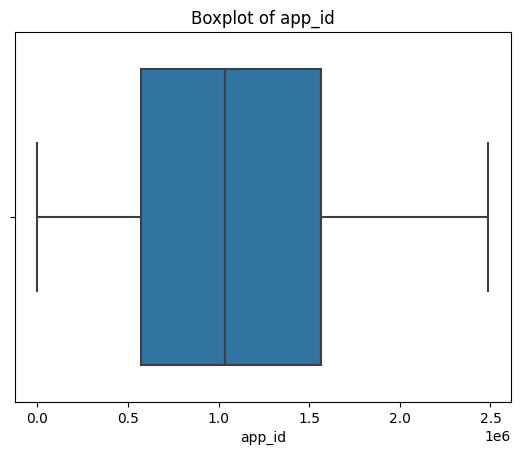

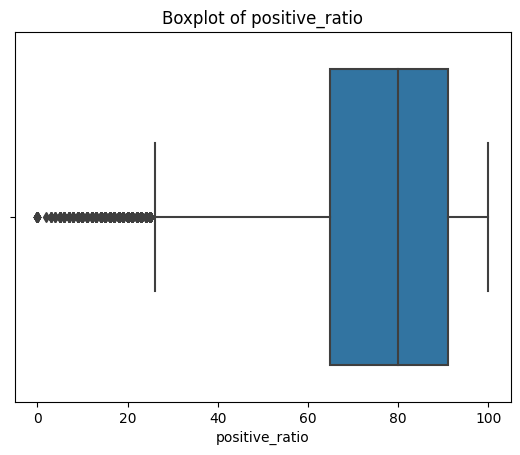

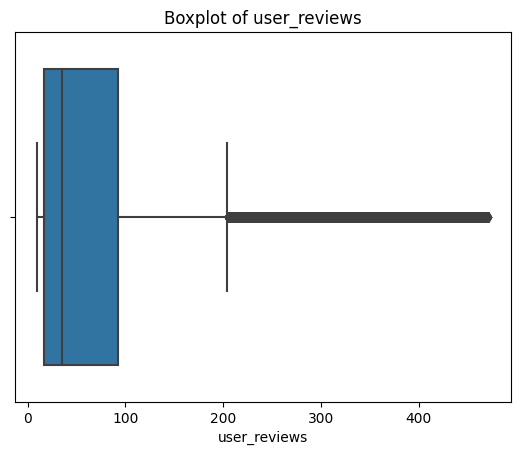

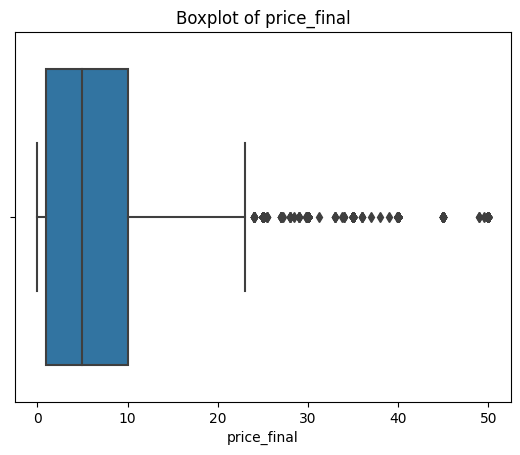

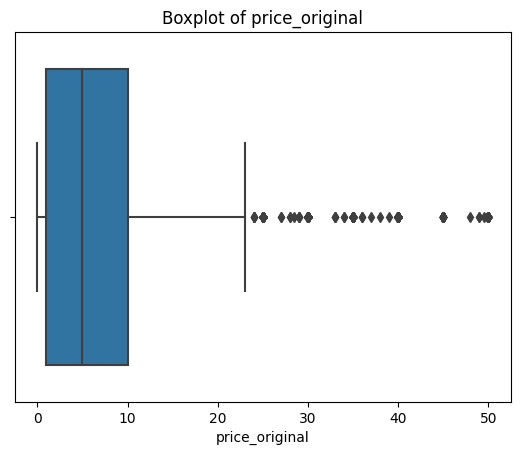

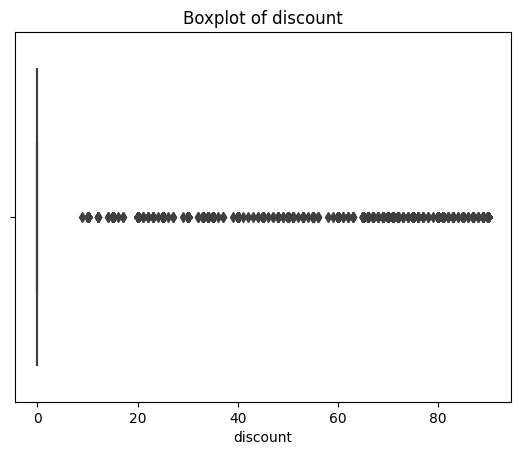

In [80]:
numerical_columns = df_t1.select_dtypes(include=['int', 'float']).columns

# Create separate boxplots for numerical columns
for column in numerical_columns:
    plt.figure()  # Create a new figure for each boxplot
    sns.boxplot(x=column, data=df_t1)
    plt.title(f"Boxplot of {column}")  # Set the title for each boxplot
    plt.show()

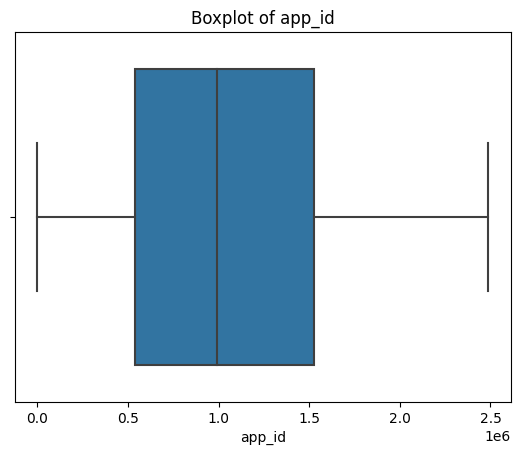

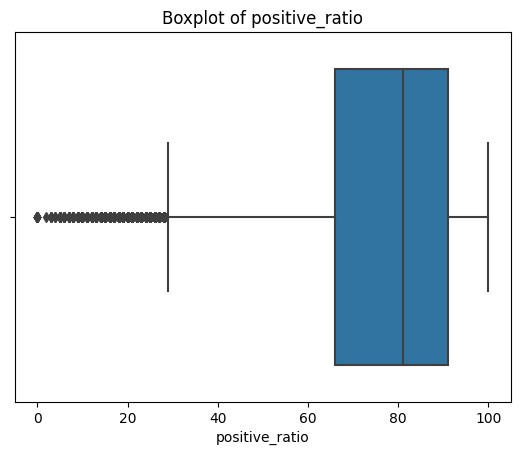

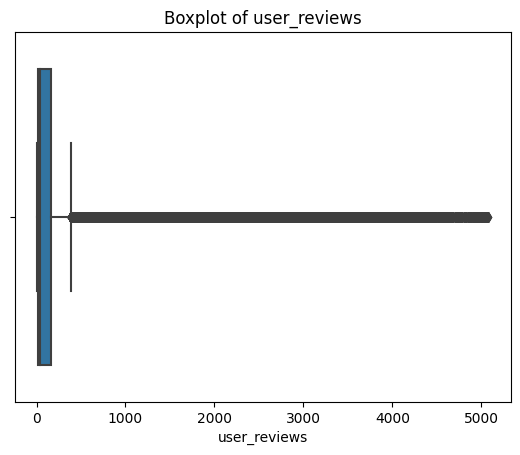

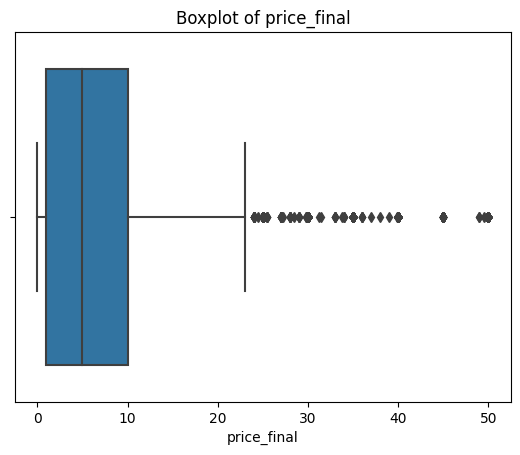

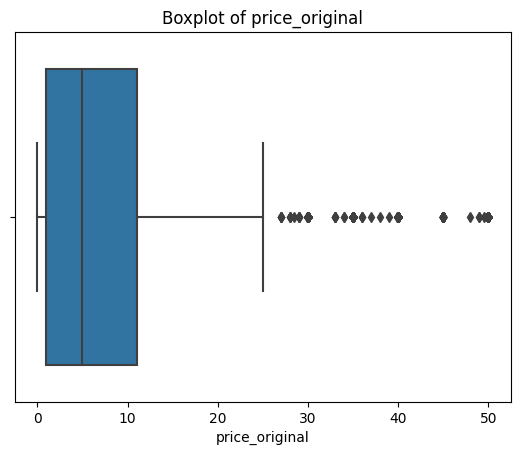

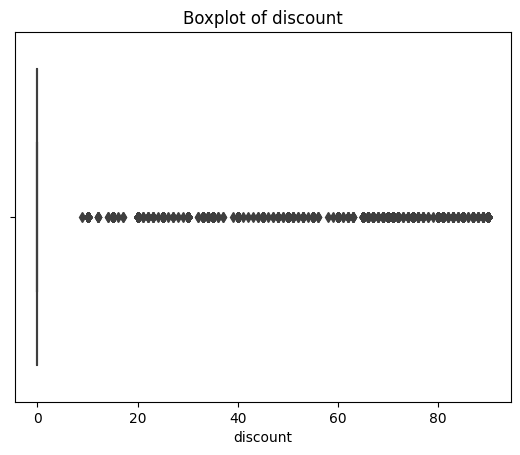

In [81]:
numerical_columns = df_t2.select_dtypes(include=['int', 'float']).columns

# Create separate boxplots for numerical columns
for column in numerical_columns:
    plt.figure()  # Create a new figure for each boxplot
    sns.boxplot(x=column, data=df_t2)
    plt.title(f"Boxplot of {column}")  # Set the title for each boxplot
    plt.show()

In [65]:
df.describe()

,app_id,positive_ratio,user_reviews,price_final,price_original,discount
count,5.050300e+04,50503.000000,5.050300e+04,50503.000000,50503.000000,50503.000000
mean,1.048405e+06,77.033622,1.776163e+03,8.549623,9.166772,5.716254
std,6.058853e+05,18.261259,3.912721e+04,11.468167,11.917905,18.779479
min,1.000000e+01,0.000000,1.000000e+01,0.000000,0.000000,0.000000
25%,5.265205e+05,67.000000,1.900000e+01,0.990000,1.990000,0.000000
50%,9.793100e+05,81.000000,4.800000e+01,4.990000,4.990000,0.000000
75%,1.514985e+06,91.000000,2.040000e+02,10.990000,12.990000,0.000000
max,2.488153e+06,100.000000,7.297791e+06,299.990000,299.990000,90.000000


In [66]:
df_t1.describe()

,app_id,positive_ratio,user_reviews,price_final,price_original,discount
count,4.218600e+04,42186.000000,42186.000000,42186.000000,42186.000000,42186.000000
mean,1.094045e+06,76.134547,77.363675,7.042153,7.557307,5.852178
std,6.032104e+05,18.867024,97.113432,7.967081,8.222626,19.024190
min,6.300000e+02,0.000000,10.000000,0.000000,0.000000,0.000000
25%,5.712425e+05,65.000000,17.000000,0.990000,0.990000,0.000000
50%,1.034885e+06,80.000000,35.000000,4.990000,4.990000,0.000000
75%,1.566828e+06,91.000000,93.000000,9.990000,9.990000,0.000000
max,2.488153e+06,100.000000,481.000000,49.990000,49.990000,90.000000


In [82]:
df_t2.describe()

,app_id,positive_ratio,user_reviews,price_final,price_original,discount
count,4.821500e+04,48215.000000,48215.000000,48215.000000,48215.000000,48215.000000
mean,1.059120e+06,76.772249,260.377517,7.605534,8.136653,5.682443
std,6.033756e+05,18.381772,627.530923,8.494264,8.745097,18.717835
min,3.000000e+01,0.000000,10.000000,0.000000,0.000000,0.000000
25%,5.393350e+05,66.000000,18.000000,0.990000,0.990000,0.000000
50%,9.927500e+05,81.000000,44.000000,4.990000,4.990000,0.000000
75%,1.525225e+06,91.000000,165.000000,9.990000,10.990000,0.000000
max,2.488153e+06,100.000000,5079.000000,49.990000,49.990000,90.000000


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50503 entries, 0 to 50502
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app_id          50503 non-null  int64  
 1   title           50503 non-null  object 
 2   date_release    50503 non-null  object 
 3   win             50503 non-null  bool   
 4   mac             50503 non-null  bool   
 5   linux           50503 non-null  bool   
 6   rating          50503 non-null  object 
 7   positive_ratio  50503 non-null  int64  
 8   user_reviews    50503 non-null  int64  
 9   price_final     50503 non-null  float64
 10  price_original  50503 non-null  float64
 11  discount        50503 non-null  float64
 12  steam_deck      50503 non-null  bool   
 13  description     50503 non-null  object 
 14  tags            50503 non-null  object 
dtypes: bool(4), float64(3), int64(3), object(5)
memory usage: 4.4+ MB


In [68]:
df_t1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42186 entries, 1 to 50502
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app_id          42186 non-null  int64  
 1   title           42186 non-null  object 
 2   date_release    42186 non-null  object 
 3   win             42186 non-null  bool   
 4   mac             42186 non-null  bool   
 5   linux           42186 non-null  bool   
 6   rating          42186 non-null  object 
 7   positive_ratio  42186 non-null  int64  
 8   user_reviews    42186 non-null  int64  
 9   price_final     42186 non-null  float64
 10  price_original  42186 non-null  float64
 11  discount        42186 non-null  float64
 12  steam_deck      42186 non-null  bool   
 13  description     42186 non-null  object 
 14  tags            42186 non-null  object 
dtypes: bool(4), float64(3), int64(3), object(5)
memory usage: 4.0+ MB


In [83]:
df_t2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48215 entries, 0 to 50502
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app_id          48215 non-null  int64  
 1   title           48215 non-null  object 
 2   date_release    48215 non-null  object 
 3   win             48215 non-null  bool   
 4   mac             48215 non-null  bool   
 5   linux           48215 non-null  bool   
 6   rating          48215 non-null  object 
 7   positive_ratio  48215 non-null  int64  
 8   user_reviews    48215 non-null  int64  
 9   price_final     48215 non-null  float64
 10  price_original  48215 non-null  float64
 11  discount        48215 non-null  float64
 12  steam_deck      48215 non-null  bool   
 13  description     48215 non-null  object 
 14  tags            48215 non-null  object 
dtypes: bool(4), float64(3), int64(3), object(5)
memory usage: 4.6+ MB


In [69]:
42186/50503

0.8353167138585826

### The cleaning way is good as the mean of columns did not change much

In [ ]:
df_clean = df_t1

In [ ]:
sns.boxenplot(x = 'user_reviews', data = df_clean)

In [ ]:
df_clean.head()

In [ ]:
# Drop description column
df_clean = df_clean.drop('description', axis=1)

In [ ]:
df_clean[['win', 'mac', 'linux', 'steam_deck']].apply(pd.value_counts)

### Drop steam_deck columns as only 2 records without steam deck

In [ ]:
df_clean = df_clean.drop('steam_deck', axis=1)

In [ ]:
platform_counts = df_clean[['win', 'mac', 'linux']].sum()

# Plotting the pie chart
plt.figure(figsize=(6, 6))
plt.pie(platform_counts, labels=platform_counts.index, autopct='%1.1f%%')
plt.title('Platform Distribution')
plt.show()

In [ ]:
rating_percentage = df_clean['rating'].value_counts(normalize=True) * 100

# Create a pie chart
plt.figure(figsize=(20, 10))
plt.pie(rating_percentage, labels=rating_percentage.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Ratings')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
# plot the histograms for all three DataFrames together
sns.histplot(data=df_clean['positive_ratio'], kde=True)


In [ ]:
df_clean.info()

In [ ]:
df_clean['rating'].unique()

In [ ]:
def rating_cat(x):
    if x in ['Overwhelmingly Positive', 'Very Positive', 'Positive']:
        return 'Positive'
    elif x in ['Mostly Positive', 'Mixed', 'Mostly Negative']:
        return 'Neutral'
    else:
        return 'Negative'

In [ ]:
df_clean['rating_group'] = df_clean['rating'].apply(rating_cat)

In [ ]:
df_clean = df_clean.drop('rating', axis=1)

In [ ]:
df_clean.head(10)

In [ ]:
df_clean = df_clean.reset_index()

In [ ]:
df_clean.info()

In [ ]:
rating_dummies = pd.get_dummies(df_clean['rating_group'])

df_clean = pd.concat([df_clean,rating_dummies], axis=1)

In [ ]:
df_clean = df_clean.drop('rating_group', axis=1)

In [ ]:
df_clean.info()

In [ ]:
def discount_YN(x):
    if x > 0:
        return True
    else:
        return False

In [ ]:
df_clean['discount_YN'] = df_clean['discount'].apply(discount_YN)

In [ ]:
df_clean_t1 = df_clean

In [ ]:
df_clean_t1 = df_clean_t1.explode('tags')

In [ ]:
df_clean_t1.head()

In [ ]:
# Create season dummies
tags_dummies = pd.get_dummies(df_clean_t1['tags'])

In [ ]:
df_clean_t1 = pd.concat([df_clean_t1,tags_dummies], axis=1)


In [ ]:
import pandas as pd

# Assuming you have a DataFrame named 'df' with the columns as shown in your example

# List of columns to group by (excluding 'tags')
groupby_columns = ['app_id', 'title', 'date_release', 'win', 'mac', 'linux', 'positive_ratio', 'user_reviews', 'price_final', 'price_original', 'discount', 'Negative', 'Neutral', 'Positive', 'discount_YN']

# Aggregate the data using 'max()' as an example (choose the appropriate aggregation function for your use case)
aggregated_df = df_clean_t1.groupby(groupby_columns, as_index=False).max()

aggregated_df


In [ ]:
# count the number of unique value in the tags column
value_counts_series_t10 = df_clean_t1['tags'].value_counts().head(10)

# Plotting the pie chart using Matplotlib
plt.figure(figsize=(8, 8))
plt.pie(value_counts_series_t10, labels=value_counts_series_t10.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Top 10 Tags')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is drawn as a circle.
plt.show()

In [ ]:
top10_tag = value_counts_series_t10.index.tolist()

# set up the list of columns that are not going to drop
allowed_columns = top10_tag + groupby_columns

# drop columns that are not in the 'allowed_columns' list
filtered_df = aggregated_df.drop(columns=[col for col in aggregated_df.columns if col not in allowed_columns])

filtered_df

In [ ]:
filtered_df.info()

In [ ]:
sns.scatterplot(x= 'user_reviews', y= 'positive_ratio', data= filtered_df)

In [ ]:
# Get all column names as a list
column_names = df_clean[]


# Combine all column names into a single variable
correlation_matrix = df_clean[column_names].corr()

print(correlation_matrix)

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Matrix")
plt.show()